円形に分布するデータを生成し、学習データと検証データに分割、  
学習データを用いてモデルを学習させた後に、検証データで正解率を評価する。

クラス分類毎に色分けして描画する。  
色分け用にクラス毎に別々のデータフレームに分ける。

In [87]:
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#データの色分け(これだけで分割できる！！)
X_orange = X[y==0,:]
X_blue = X[y==1,:]

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9777777777777777

★データフレームを使用して色分け描画する処理。  
生成したデータをデータフレームに変換し、結合する。

In [91]:
import pandas as pd
datas = pd.DataFrame(X)
classes = pd.DataFrame(y)
datas[2] = classes

色分け用にクラス毎に別々のデータフレームに分ける。

In [92]:
datas_0 = datas[datas[2]==0]
datas_1 = datas[datas[2]==1]

クラス分類毎に色分けして描画する。  

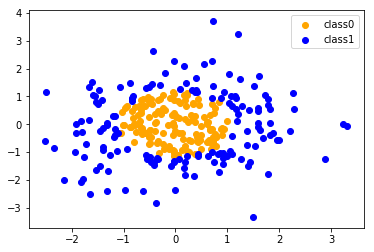

In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(datas_0[0], datas_0[1], c = "orange", label = "class0")
plt.scatter(datas_1[0], datas_1[1], c = "blue", label = "class1")

plt.legend()
plt.show()

★データフレームを使わずに色分け描画する処理。

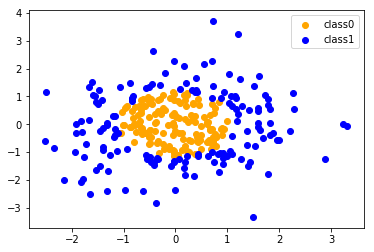

In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_orange[:,0],X_orange[:,1],c="orange", label="class0")
plt.scatter(X_blue[:,0],X_blue[:,1],c="blue", label="class1")

plt.legend()
plt.show()

境界線の描画。

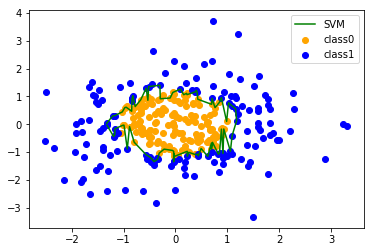

In [113]:
# 決定境界の描画の準備
line = model.support_vectors_#決定境界線
line_u = line[line[:,1] > 0,:]
line_d = line[line[:,1] <= 0,:]
line_u = line_u[np.argsort(line_u[:,0]),:]
line_d = line_d[np.argsort(-line_d[:,0]),:]
l = np.concatenate([line_u,line_d])
#l = np.concatenate([l,[l[0,:]]])

plt.scatter(X_orange[:,0],X_orange[:,1],c="orange", label="class0")
plt.scatter(X_blue[:,0],X_blue[:,1],c="blue", label="class1")

plt.plot(l[:,0],l[:,1],c="green",label="SVM")
plt.legend()

In [109]:
l

array([[-1.32788392,  0.02722672],
       [-1.21341302,  0.29221706],
       [-1.16751549,  0.3114471 ],
       [-1.02640755,  0.4406373 ],
       [-0.97731719,  0.59504839],
       [-0.95138487,  0.6107404 ],
       [-0.84511092,  0.46741145],
       [-0.8378091 ,  0.91856064],
       [-0.83247319,  0.94759546],
       [-0.82350124,  1.02460777],
       [-0.77705758,  0.63312331],
       [-0.66997853,  0.87664095],
       [-0.56558541,  1.29447788],
       [-0.53203798,  0.86088025],
       [-0.51629068,  1.35411722],
       [-0.29969788,  1.3997156 ],
       [-0.2931859 ,  0.91436526],
       [-0.10360574,  0.9412251 ],
       [-0.05105475,  1.14212874],
       [ 0.09397079,  1.26287619],
       [ 0.15927285,  1.05935055],
       [ 0.21323751,  1.11026824],
       [ 0.22218931,  1.06374621],
       [ 0.38177734,  1.1593921 ],
       [ 0.40212896,  1.21673975],
       [ 0.41714829,  1.15205672],
       [ 0.43078866,  0.89795957],
       [ 0.6971948 ,  0.71395809],
       [ 0.70481668,